# Dream Market's Cocaine 

## "Existe un amazon.com oculto dirigido al mundo de las drogas ilegales" 

Esta libreta se basa en un dataset que contine algunas variables interesantes con las cuales se espera obtener un panorama general sobre como se comportan las ventas de drogas ilegales en la dark web.


# Introducción

En la actualidad las compras por internet se han convertido en algo completamente normal para las personas, hasta el punto en el que el mercado se ha convertido en el mundo entero, existen compradores para cualquier producto. Claro que como para aquellos productos que no se pueden comprar en la tiendita de la esquina existe un mercado negro, tambien existe un mercado negro de compras en internet, que va desde comprar (inserte su pensamiento mas bizarro aqui) hasta (otro aun mas bizarro aqui ). 

Dejando de lado sus pensamientos cochinos, en este documento hablaremos en concreto sobre el mundo de las drogas en internet ya que para algunas personas que no viven en México y que para su desgracia no tienen un "tiradero" en cada colonia de la ciudad abierto las 24 horas del dia, los 365 dias de la semana, existe aun una solucion.

#### Comprar drogas por internet.

Comprar drogas por internet es algo bastante serio, principalmente por que mantener el anonimato es algo imprescindible en el mundo virtual, tanto por el lado de los compradores como por el de los vendedores, asi que uno pensaria que es un poco dificil 
hacer este tipo de compras y la verdad es que si lo es, pero una vez dentro ¿Que es lo que a uno le espera? ¿cuanto podre comprar? ¿con que voy a pagar para que no me rastreen? ¿cuanto me va a costar? y un monton de pregunas mas.
Para comprender un poco mejor como funciona esto, usaremos el siguiente dataset: https://www.kaggle.com/everling/cocaine-listings que contiene informacion de aproximadamente 1400 productos, colectado mediante una tecnica de gathering llamada web-scraping, en el año 2017.







##  Datos del sitio web


In [1]:
import pandas as pd
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
import seaborn as sns; sns.set()
from IPython.display import Image
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np
import pandas
from mpl_toolkits.mplot3d import Axes3D

## Resumen de los datos que contiene el archivo "coca.csv"

In [2]:
coca_datos = pd.read_csv('coca.csv') #cargando los datos del archivo llamado coca en formato .csv
clustcoca = pd.read_csv('coca.csv') #cargando los datos del archivo llamado coca en formato .csv este dataset tiene solo las columnas que considero importantes para este doc.
ch = pd.read_csv('coca.csv')
coca_datos.head(10)

,Unnamed: 0,product_title,ships_from_to,grams,quality,btc_price,cost_per_gram,cost_per_gram_pure,escrow,product_link,...,ships_to_SE,ships_from_SE,ships_to_CO,ships_from_CO,ships_to_CN,ships_from_CN,ships_to_PL,ships_from_PL,ships_to_GR,ships_from_GR
0,10,!!!!!INTRO OFFER!!!!! 1GR COCAINE 90%,NL → EU,1.0,90.0,0.02577,0.025770,0.028633,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
1,11,!!!!!INTRO OFFER!!!!! 2GR COCAINE 90%,NL → EU,2.0,90.0,0.05150,0.025750,0.028611,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
2,14,!!!INTRO!!! 0.5G COCAINE 89% - STRAIGHT FROM T...,NL → EU,0.5,89.0,0.01649,0.032980,0.037056,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
3,20,!1G! C O L O M B I A N C O C A I N E - 89% PURITY,FR → EU,1.0,89.0,0.04120,0.041200,0.046292,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
4,41,** 1 Gram 87% Pure Uncut Colombian Cocaine **,NL → WW,1.0,87.0,0.03400,0.034000,0.039080,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
5,42,** 10 Gram 87% Pure Uncut Colombian Cocaine **,NL → WW,10.0,87.0,0.27050,0.027050,0.031092,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
6,43,** 2 Gram 87% Pure Uncut Colombian Cocaine **,NL → WW,2.0,87.0,0.06230,0.031150,0.035805,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
7,44,** 3 Gram 87% Pure Uncut Colombian Cocaine **,NL → WW,3.0,87.0,0.08900,0.029667,0.034100,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
8,45,** 5 Gram 87% Pure Uncut Colombian Cocaine **,NL → WW,5.0,87.0,0.14170,0.028340,0.032575,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
9,57,***** 0.5 gm uk to uk sociable cocaine 75%,GB → GB,0.5,75.0,0.01173,0.023460,0.031280,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False


In [3]:
clustcoca.drop(['product_title', 'vendor_name', 'vendor_link','product_link','ships_from_to','ships_from',
               'ships_to_SE','ships_to_CO','ships_to_CN','ships_to_PL','ships_from_PL','ships_to_GR','ships_to_CH',
               'ships_from_CH','ships_to_BR','ships_from_BR','ships_to_CZ','ships_from_CZ','ships_from_SE','ships_from_CO',
               'ships_from_CN','ships_from_GR','ships_from_S. America','ships_to_S. America','ships_from_DK','ships_to_DK',
               'ships_from_IT','ships_to_IT','ships_from_SI','ships_to_SI','ships_from_WW','ships_to_WW','ships_from_BE',
               'ships_to_BE','ships_from_N. America','ships_to_N. America','ships_from_ES','ships_from_EU','ships_from_AU',
               'ships_to_AU','ships_to_ES','ships_to_EU','ships_from_DE','ships_to_DE','ships_from_CA','ships_to_CA',
               'ships_from_GB','ships_to_GB','ships_from_FR','ships_to_FR','ships_from_NL','ships_to_NL','ships_from_US',
               'ships_to_US','ships_to','Unnamed: 0'], axis=1,inplace=True)#eliminando aquellas variables con las que no puedo hacer predicción. 


In [4]:
coca_datos.columns # mostrando todas las columnas de nuestro dataset sin limpiar


Index(['Unnamed: 0', 'product_title', 'ships_from_to', 'grams', 'quality',
       'btc_price', 'cost_per_gram', 'cost_per_gram_pure', 'escrow',
       'product_link', 'vendor_link', 'vendor_name', 'successful_transactions',
       'rating', 'ships_from', 'ships_to', 'ships_to_US', 'ships_from_US',
       'ships_to_NL', 'ships_from_NL', 'ships_to_FR', 'ships_from_FR',
       'ships_to_GB', 'ships_from_GB', 'ships_to_CA', 'ships_from_CA',
       'ships_to_DE', 'ships_from_DE', 'ships_to_AU', 'ships_from_AU',
       'ships_to_EU', 'ships_from_EU', 'ships_to_ES', 'ships_from_ES',
       'ships_to_N. America', 'ships_from_N. America', 'ships_to_BE',
       'ships_from_BE', 'ships_to_WW', 'ships_from_WW', 'ships_to_SI',
       'ships_from_SI', 'ships_to_IT', 'ships_from_IT', 'ships_to_DK',
       'ships_from_DK', 'ships_to_S. America', 'ships_from_S. America',
       'ships_to_CH', 'ships_from_CH', 'ships_to_BR', 'ships_from_BR',
       'ships_to_CZ', 'ships_from_CZ', 'ships_to_SE', 'ships_f

In [5]:
clustcoca.columns # mostrando columnas restantes despues de eliminar aquellas con variables categoricas

Index(['grams', 'quality', 'btc_price', 'cost_per_gram', 'cost_per_gram_pure',
       'escrow', 'successful_transactions', 'rating'],
      dtype='object')

In [6]:
ch.drop(['product_title', 'vendor_link','product_link','ships_from',
               'ships_to_SE','ships_to_CO','ships_to_CN','ships_to_PL','ships_from_PL','ships_to_GR','ships_to_CH',
               'ships_from_CH','ships_to_BR','ships_from_BR','ships_to_CZ','ships_from_CZ','ships_from_SE','ships_from_CO',
               'ships_from_CN','ships_from_GR','ships_from_S. America','ships_to_S. America','ships_from_DK','ships_to_DK',
               'ships_from_IT','ships_to_IT','ships_from_SI','ships_to_SI','ships_from_WW','ships_to_WW','ships_from_BE',
               'ships_to_BE','ships_from_N. America','ships_to_N. America','ships_from_ES','ships_from_EU','ships_from_AU',
               'ships_to_AU','ships_to_ES','ships_to_EU','ships_from_DE','ships_to_DE','ships_from_CA','ships_to_CA',
               'ships_from_GB','ships_to_GB','ships_from_FR','ships_to_FR','ships_from_NL','ships_to_NL','ships_from_US',
               'ships_to_US','ships_to','Unnamed: 0'], axis=1,inplace=True)

### Descripción de las variables 

Con el resumen de los datos podemos darnos una pequeña idea de lo que trata este conjunto de datos.

- Imaginense que son ustedes los que estan buscando comprar cocaina por internet, ¿que criterio utilizarian 
para realizar su compra?.<br>

En el dataset se pueden encontrar variables tanto categoricas como cuantitativas pero, son las cuantitativas 
las que parecen describir mejor la tendencia de los datos y por lo tanto el comportamiento de compradores de cocaina en la dark web. <br>




  
#### 'product_title'
contiene un resumen de lo que buscas (si es pura, la calidad, el costo) no en todos los casos 
#### 'ships_from_to'
(de donde viene y a donde se envia)
#### 'grams'
(la cantidad de gramos que un vendedor manda)
algunos vendedores se anuncian como "0.5G COCAINE 89% "  y otros "10 Gram 87% Pure Uncut Colombian Cocaine" como que no dejan lugar a que tu puedas comprar lo que te de la gana. 
#### 'quality'
La calidad de la cocaina que venden, como ejemplo, la denominada "Yen” es más pura (roza el 98%) y más blanca, escamosa y brillante. Ahora bien, existen otros tipos de cocaína en polvo con menos pureza, en la que su presentación es más polvorienta y con menor brillo. Esto ocurre porque para su comercialización se añaden una serie de sustancias químicas que pueden ser altamente tóxicas. Cuantas menos sustancias incorpore más pura es la coca y es considerada de mayor calidad.
#### 'btc_price'
el precio en bitcoins del producto que venden
#### 'cost_per_gram'
costo por gramo de coca no pura 
#### 'cost_per_gram_pure'
costo por gramo de coca pura
#### 'product_link'
el enlace hacia el producto
#### 'vendor_link'
enlace del vendedor 
#### 'vendor_name'
nombre del vendedor
#### 'successful_transactions'
numero de transacciones exitosas
#### 'rating'
rating del vendedor 


    

## Primera observación

Con solo leer las etiquetas del dataset es facil hacerse una idea, mejor dicho muchas ideas del comportamiento de los datos.<br>
Como ejemplo yo podria crear una hipotesis que se base directamente en la calidad de la cocaina, es decir que la calidad desde mi punto de vista deberia estar relacionada con diferentes variables de la siguiente forma:

- mayor calidad implica mayor precio
- mayor calidad implica correlación con la variable cost_per_gram
- mayor calidad implica correlación con la variable cost_per_gram_pure
- mayor calidad implica correlación con la variable rating 

El objetivo es utilizar las tecnicas de visualizacion de datos, no necesariamente para respaldar nuestra hipotesis (al menos no tan rapido), la idea es crear una hipotesis basados directamente en la informacion de nuestro dataset y no en nuestro criterio de organización o forma de pensar que muchas veces termina sesgando los datos a nuestra conveniencia.







## La forma de los datos

Es importante ver la distribución de los datos para darnos una idea de los problemas que nos pueden dar si no son tratados correctamente, conocer su comportamiento siempre es algo que beneficia bastante.

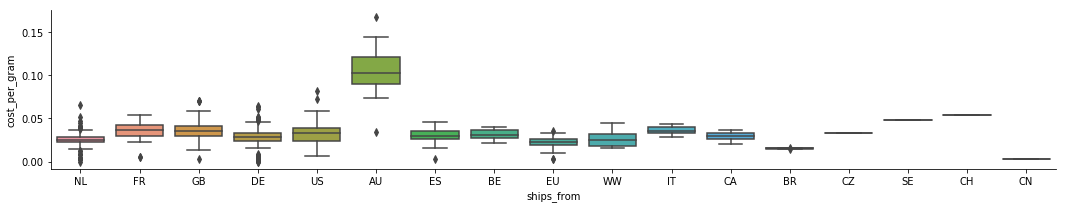

In [7]:
from IPython.display import Image 
Image (filename="img/envios.png", width=1000, height=1000)

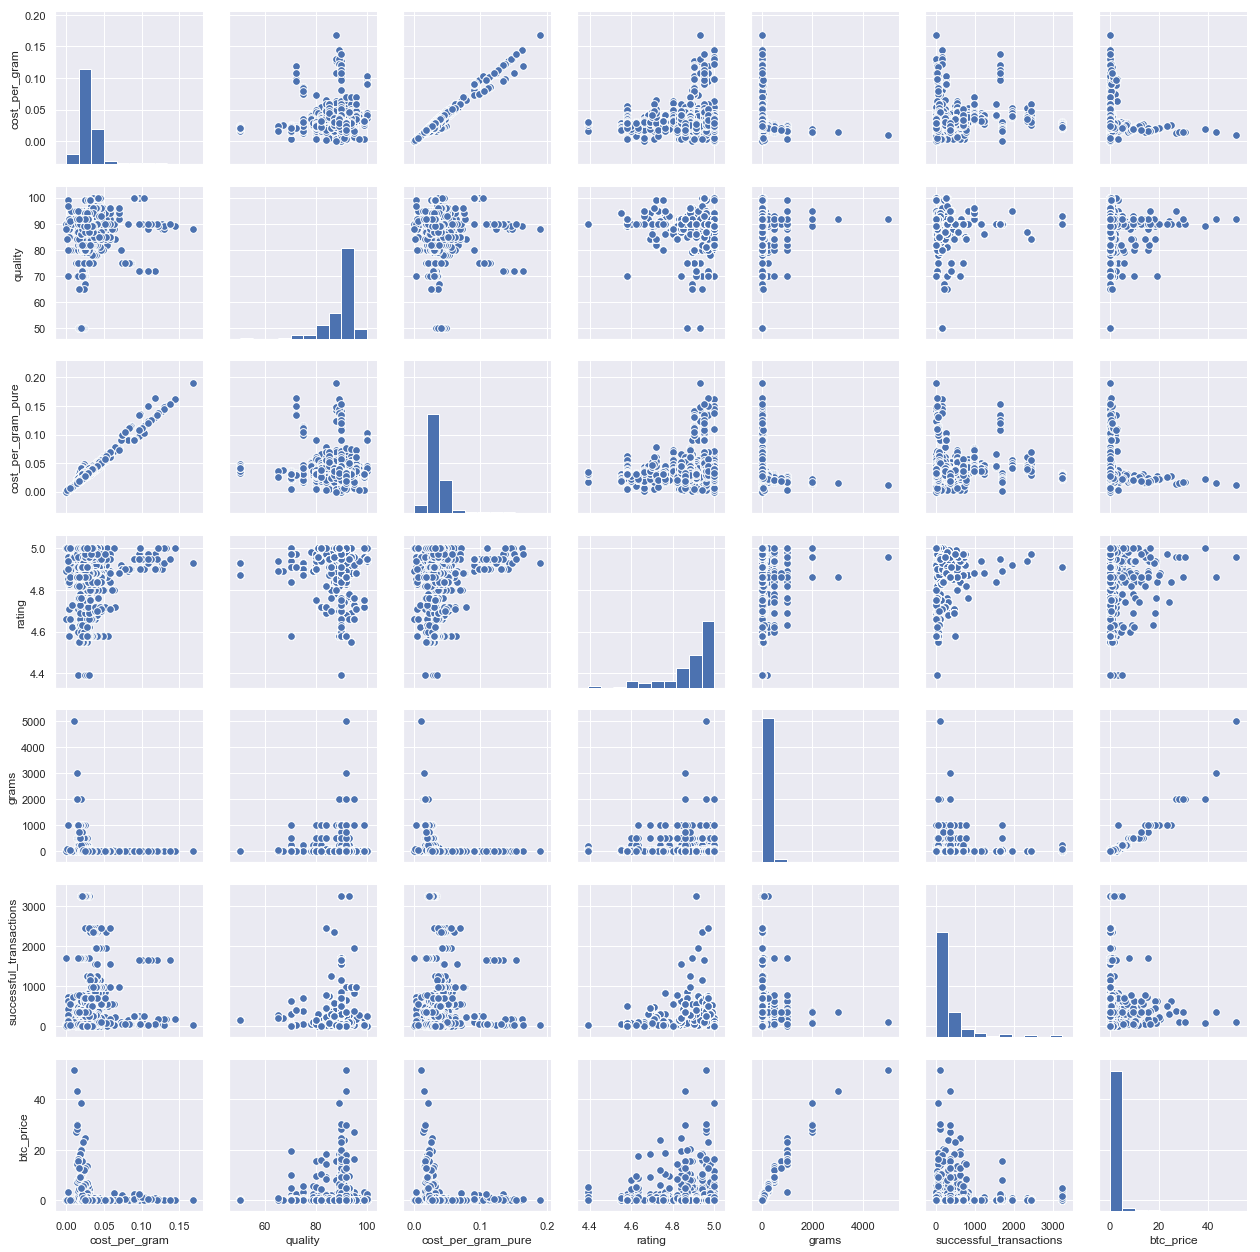

In [8]:
g = sns.PairGrid(clustcoca, vars=["cost_per_gram", "quality","cost_per_gram_pure", "rating","grams","successful_transactions","btc_price"])
g = g.map_diag(plt.hist, edgecolor="w")
g = g.map_offdiag(plt.scatter, edgecolor="w", s=60)


In [9]:
clustcoca.corr()

,grams,quality,btc_price,cost_per_gram,cost_per_gram_pure,escrow,successful_transactions,rating
grams,1.000000,0.030695,0.960451,-0.178628,-0.178273,-0.148276,-0.012006,0.009282
quality,0.030695,1.000000,0.027096,0.082540,-0.064907,0.031008,0.053754,-0.055191
btc_price,0.960451,0.027096,1.000000,-0.171318,-0.170636,-0.159067,-0.008213,0.000539
cost_per_gram,-0.178628,0.082540,-0.171318,1.000000,0.985784,-0.170052,0.063822,0.121977
cost_per_gram_pure,-0.178273,-0.064907,-0.170636,0.985784,1.000000,-0.170629,0.051564,0.126917
escrow,-0.148276,0.031008,-0.159067,-0.170052,-0.170629,1.000000,-0.029527,-0.037400
successful_transactions,-0.012006,0.053754,-0.008213,0.063822,0.051564,-0.029527,1.000000,0.062433
rating,0.009282,-0.055191,0.000539,0.121977,0.126917,-0.037400,0.062433,1.000000


## Comportamiento de los datos

De la grafica de distribuciónes de nuestros datos y la tabla de correlaciónes, podriamos crear hipotesis mas realistas
y respaldadas directamente con la información del dataset.

- Calidad <br>
como se habia planteado en la primera observación se decia que la calidad mantenia una relacion estrecha con todas las demas
variables, pero no ha resultado como se pensaba. Por relacion estrecha mas que nada me referia a una correlacion positiva ya que uno espera que por ejemplo entre mayor calidad el rating sea mas alto. Claro que tienen una relacion entre ellas pero no es una relacion lineal como esperaba, puede ser una relacion cuadratica, logaritmica o quien sabe de que tipo, ya que nuestros datos se ven afectados por otras variables y en dos dimensiones solo podemos ver una pequeña idea de la relacion entre ellas. 


## Factores que influyen en el precio de la cocaina 


### Anomalías 
como podemos observar en el diagrama de correlacion e histogramas existen datos que a simple vista parecer bastante raros como es el caso de la variable "btc_price" y la variable "grams" que se encuentran correlacionados de forma positiva y se aprecia cierta relacion podria decirse lineal entre ellas. 






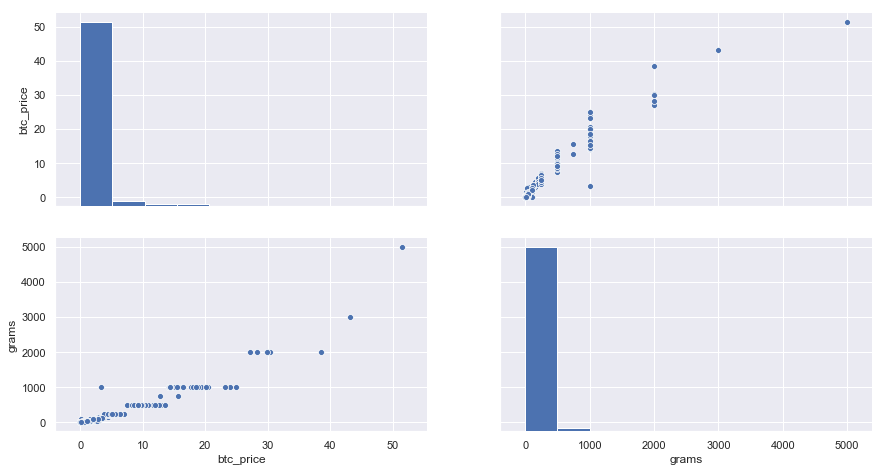

In [10]:
g=sns.pairplot(clustcoca, vars=["btc_price", "grams"])
g.fig.set_size_inches(14,7)


### variable btc_price

In [11]:
st=coca_datos["btc_price"].std() 
pr=coca_datos["btc_price"].mean() 
print ("promedio: ",pr)
print ("Desviacion estandar: ",st)

promedio:  1.1475449619355038
Desviacion estandar:  3.663561587419021


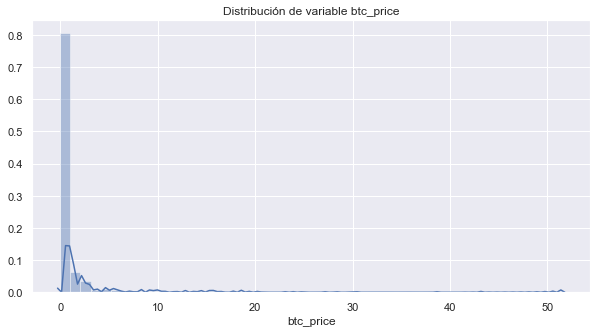

In [12]:
plt.figure(figsize=(10, 5))
plt.title('Distribución de variable btc_price')
sns.distplot (coca_datos['btc_price'])


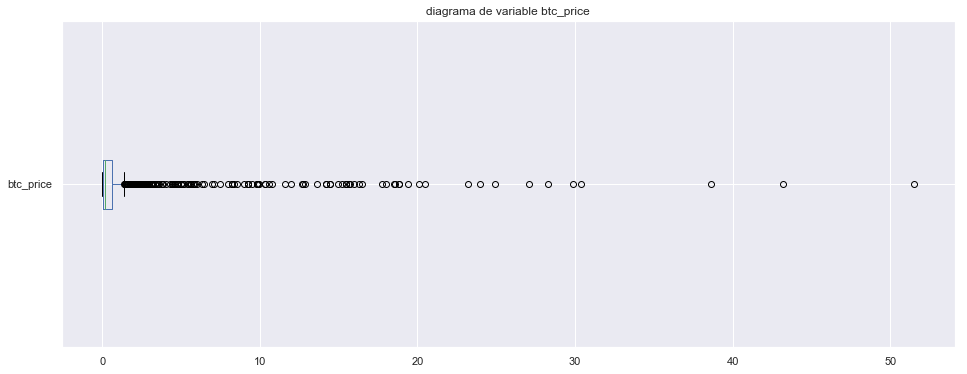

In [13]:

plt.figure(figsize=(16, 6))
plt.title('diagrama de variable btc_price')
coca_datos.boxplot(column=['btc_price'], grid = True,vert=False)


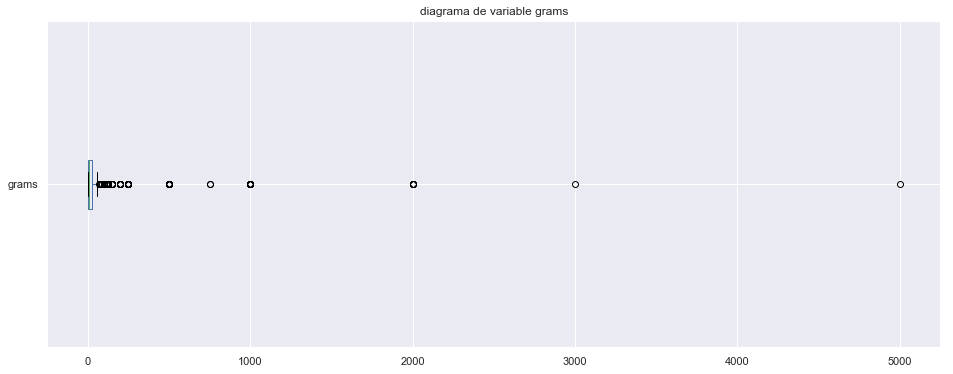

In [14]:
plt.figure(figsize=(16, 6))
plt.title('diagrama de variable grams')
coca_datos.boxplot(column=['grams'], grid = True,vert=False)

In [15]:
coca_datos.nlargest(10, ['btc_price']) 


,Unnamed: 0,product_title,ships_from_to,grams,quality,btc_price,cost_per_gram,cost_per_gram_pure,escrow,product_link,...,ships_to_SE,ships_from_SE,ships_to_CO,ships_from_CO,ships_to_CN,ships_from_CN,ships_to_PL,ships_from_PL,ships_to_GR,ships_from_GR
1033,2841,5KG Bolivian Cocaine 92%,"EU → EU, WW",5000.0,92.0,51.50,0.010300,0.011196,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
1499,4607,✯3kg FLAKES COCAINE 92% ✯GA✯,"NL → WW, US",3000.0,92.0,43.20,0.014400,0.015652,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
1215,3407,COCAINE - 2 KILOGRAM - COLOMBIAN - 89% PURE,"DE → WW, AU",2000.0,89.0,38.60,0.019300,0.021685,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
745,2026,2KG Colombian Cocaine 90%,"EU → EU, WW",2000.0,90.0,30.40,0.015200,0.016889,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
1498,4606,✯2kg FLAKES COCAINE 92% ✯GA✯,"NL → WW, US",2000.0,92.0,29.89,0.014945,0.016245,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
744,2025,2KG Bolivian Cocaine 90%,"EU → EU, WW",2000.0,90.0,28.30,0.014150,0.015722,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
541,1529,2 KG BRICK COCAINE 95% SHIPPED FROM USA,US → US,2000.0,95.0,27.10,0.013550,0.014263,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
466,1311,1KG Pure Uncut Cocaine 90%-92%,"NL → WW, EU",1000.0,90.0,24.89,0.024890,0.027656,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
465,1310,1KG PURE COCAINE 89-91% ******LIMITED TIME DI,NL → WW,1000.0,91.0,23.98,0.023980,0.026352,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
469,1314,1KG COCAINE (Peru)AAA+++ 90% Flakes Fishscale,"DE → WW, DE",1000.0,90.0,23.19,0.023190,0.025767,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False


In [16]:
bt=coca_datos["btc_price"].mode() # precio mas comun
gr=coca_datos["grams"].mode()
print ("moda de variable btc_price: ",bt)
print ("moda de variable grams: " ,gr)

moda de variable btc_price:  0    0.0309
dtype: float64
moda de variable grams:  0    1.0
dtype: float64


In [17]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (coca_datos['grams'].value_counts())
  


1.00       196
5.00       152
2.00       116
10.00      106
0.50        88
7.00        79
50.00       69
3.50        68
14.00       66
28.00       62
3.00        58
100.00      58
25.00       49
20.00       49
500.00      27
250.00      26
1000.00     26
4.00        24
15.00       20
2.50        17
56.00       14
0.20        13
0.25        12
1.50        11
200.00       7
30.00        7
150.00       6
8.00         5
7.50         5
6.00         5
0.30         5
2000.00      5
0.10         4
125.00       4
9.00         4
40.00        3
35.00        3
112.00       3
75.00        3
12.00        2
45.00        2
4.50         2
750.00       2
0.12         2
18.00        1
3000.00      1
0.60         1
0.35         1
5000.00      1
0.45         1
1.20         1
55.00        1
0.75         1
120.00       1
126.00       1
84.00        1
80.00        1
70.00        1
36.00        1
10.50        1
24.00        1
21.00        1
0.40         1
Name: grams, dtype: int64


### Explicación de variable btc_price y grams

como podemos observar en la distribución de la variables y principalmente en el diagrama de caja de btc_price tenemos bastantes valores atipicos originados principalmente por cantidades de cocaina fuera de lo "normal" que se venden en el sitio. <br>
Se puede observar la cantidad que mas se vende es 1 gramo pero ya no estamos hablando de gramos, todos esos valores atipicos pertenecen a personas que han decidido vender kilos, Como se puede apreciar en el resumen, el maximo que se publica es 5 kg (variable grams) y ya que los gramos y el btc_price estan correlacionados, el precio se dispara a 51.5 btc.

  


### Eliminando valores atipicos 

In [18]:
dropcoca = coca_datos[ coca_datos['grams'] >= 7.0 ].index
coca_datos.drop(dropcoca , inplace=True)



In [19]:
dropcoca2 = clustcoca[ clustcoca['grams'] >= 7.0 ].index
clustcoca.drop(dropcoca2 , inplace=True)

In [20]:
coca_datos.nlargest(5, ['grams']) 


,Unnamed: 0,product_title,ships_from_to,grams,quality,btc_price,cost_per_gram,cost_per_gram_pure,escrow,product_link,...,ships_to_SE,ships_from_SE,ships_to_CO,ships_from_CO,ships_to_CN,ships_from_CN,ships_to_PL,ships_from_PL,ships_to_GR,ships_from_GR
1061,2923,6 GRAM COCAINE FISHSCALE PURE FLAKE 90% ***PROMOT,NL → EU,6.0,90.0,0.1546,0.025767,0.028630,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
1062,2938,6g Cocaine Pure Flakes 90%+,"FR → FR, EU",6.0,90.0,0.2550,0.042500,0.047222,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
1063,2943,6gr | Cocaine 88% Pure | PROMO SAMPLE SALE,"NL → WW, EU",6.0,88.0,0.1340,0.022333,0.025379,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
1428,4498,★SALE★ 6G COCAINE AAA+ 90% Flakes,"DE → WW, DE",6.0,90.0,0.2060,0.034333,0.038148,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
1462,4566,♣INTRO♣ 6G COCAINE Flakes Uncut 90%,DE → WW,6.0,90.0,0.1958,0.032633,0.036259,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False


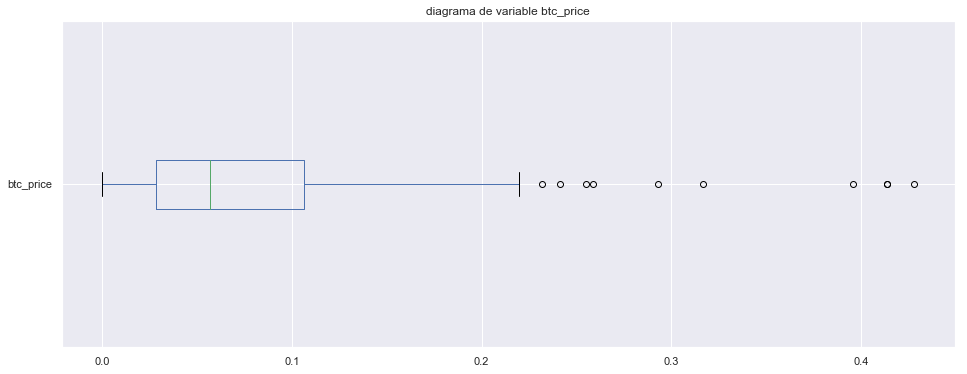

In [21]:
plt.figure(figsize=(16, 6))
plt.title('diagrama de variable btc_price')
coca_datos.boxplot(column=['btc_price'], grid = True,vert=False)

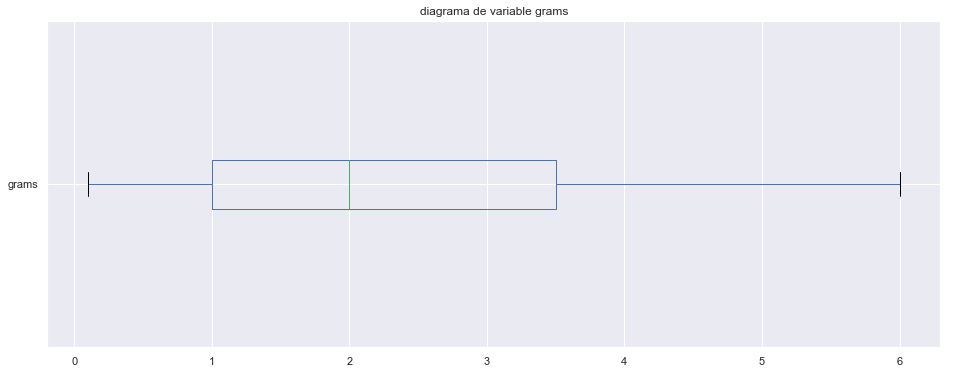

In [22]:
plt.figure(figsize=(16, 6))
plt.title('diagrama de variable grams')
coca_datos.boxplot(column=['grams'], grid = True,vert=False)

### Nueva distribución de las variables

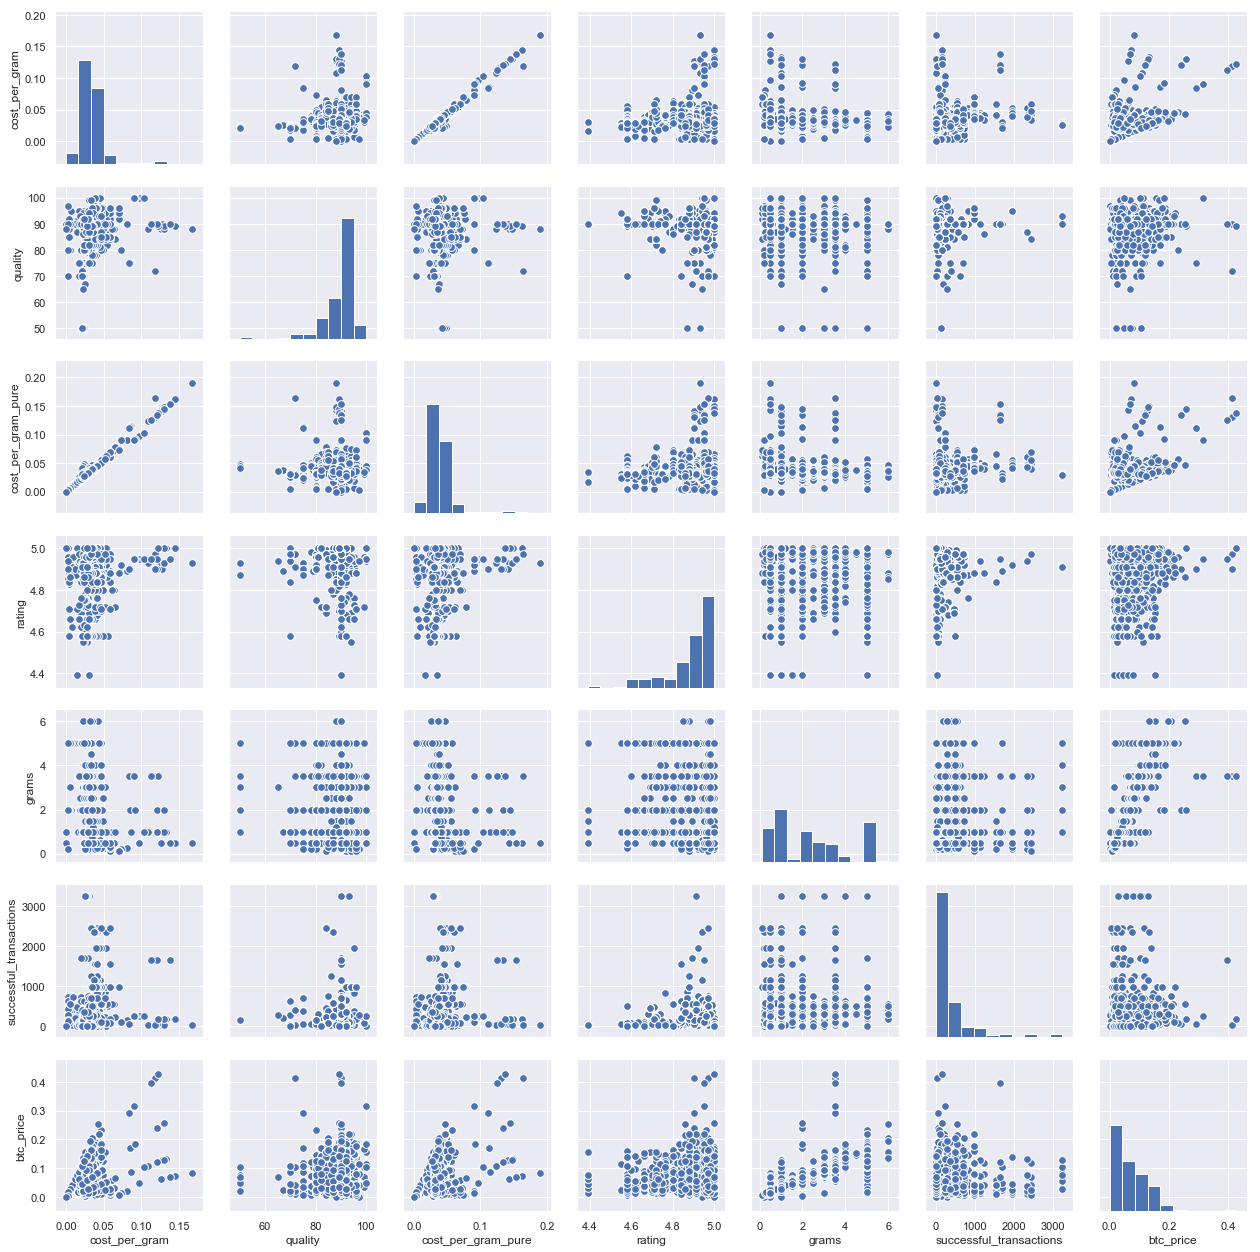

In [23]:
g = sns.PairGrid(coca_datos, vars=["cost_per_gram", "quality","cost_per_gram_pure", "rating","grams","successful_transactions","btc_price"])
g = g.map_diag(plt.hist, edgecolor="w")
g = g.map_offdiag(plt.scatter, edgecolor="w", s=60)

skewness grams = 0.4718668970701186
kurtosis grams = -1.197052087201107


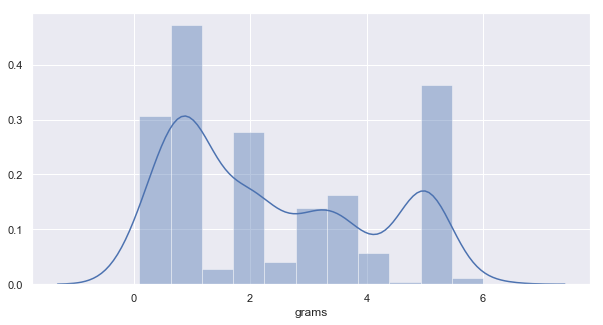

In [24]:
#### forma de las variables
plt.figure(figsize=(10, 5))
sns.distplot (coca_datos['grams'])
scpg=coca_datos['grams'].skew()
kcpg=coca_datos['grams'].kurt()
print ("skewness grams =",scpg)
print ("kurtosis grams =",kcpg)


### Gramos y btc_price

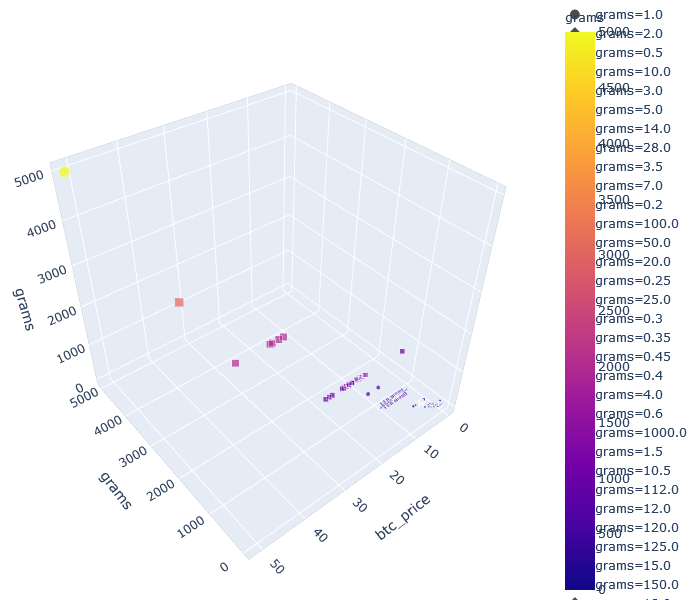

In [25]:
from IPython.display import Image 
Image (filename="img/grams.png", width=1000, height=900)



### cost_per_gram y cost_per_gram_pure

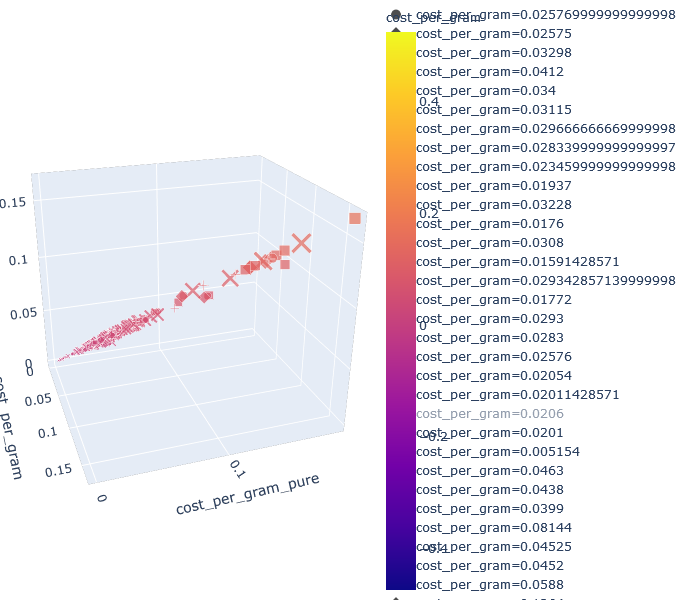

In [26]:
from IPython.display import Image 
Image (filename="img/cpg.png", width=1000, height=900)

skewness cost_per_Gram = 3.0378806107938217
kurtosis cost_per_Gram = 14.677175714310835


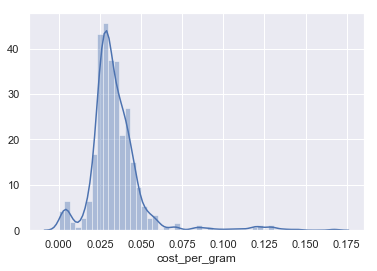

In [27]:
#### forma de las variables

sns.distplot (coca_datos['cost_per_gram'])
scpg=coca_datos['cost_per_gram'].skew()
kcpg=coca_datos['cost_per_gram'].kurt()
print ("skewness cost_per_Gram =",scpg)
print ("kurtosis cost_per_Gram =",kcpg)


skewness cost_per_gram_pure = 3.1569696878762796
kurtosis cost_per_gram_pure = 15.566892525106901


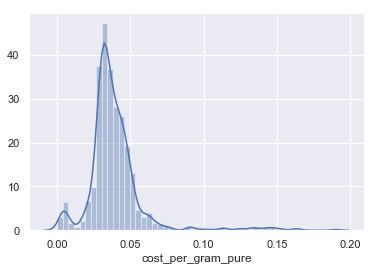

In [28]:

sns.distplot (coca_datos['cost_per_gram_pure'])
scpg=coca_datos['cost_per_gram_pure'].skew()
kcpg=coca_datos['cost_per_gram_pure'].kurt()
print ("skewness cost_per_gram_pure =",scpg)
print ("kurtosis cost_per_gram_pure =",kcpg)

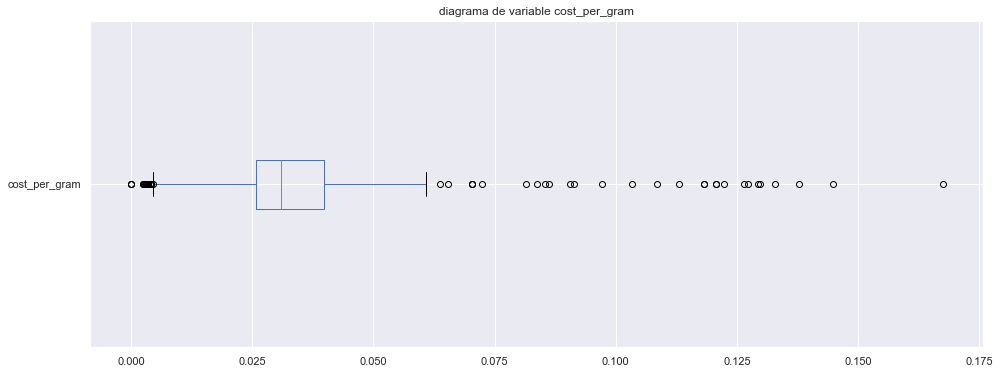

In [29]:
plt.figure(figsize=(16, 6))
plt.title('diagrama de variable cost_per_gram')
coca_datos.boxplot(column=['cost_per_gram'], grid = True,vert=False)

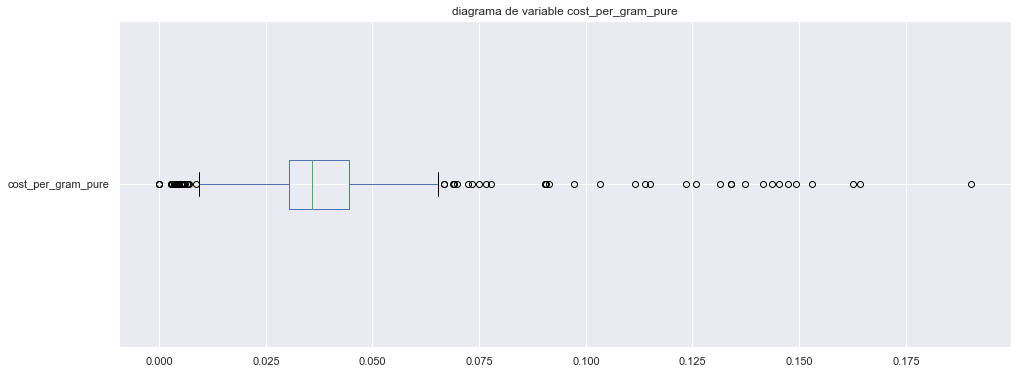

In [30]:
plt.figure(figsize=(16, 6))
plt.title('diagrama de variable cost_per_gram_pure')
coca_datos.boxplot(column=['cost_per_gram_pure'], grid = True,vert=False)

In [31]:
coca_datos.head()

,Unnamed: 0,product_title,ships_from_to,grams,quality,btc_price,cost_per_gram,cost_per_gram_pure,escrow,product_link,...,ships_to_SE,ships_from_SE,ships_to_CO,ships_from_CO,ships_to_CN,ships_from_CN,ships_to_PL,ships_from_PL,ships_to_GR,ships_from_GR
0,10,!!!!!INTRO OFFER!!!!! 1GR COCAINE 90%,NL → EU,1.0,90.0,0.02577,0.02577,0.028633,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
1,11,!!!!!INTRO OFFER!!!!! 2GR COCAINE 90%,NL → EU,2.0,90.0,0.05150,0.02575,0.028611,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
2,14,!!!INTRO!!! 0.5G COCAINE 89% - STRAIGHT FROM T...,NL → EU,0.5,89.0,0.01649,0.03298,0.037056,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
3,20,!1G! C O L O M B I A N C O C A I N E - 89% PURITY,FR → EU,1.0,89.0,0.04120,0.04120,0.046292,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
4,41,** 1 Gram 87% Pure Uncut Colombian Cocaine **,NL → WW,1.0,87.0,0.03400,0.03400,0.039080,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False


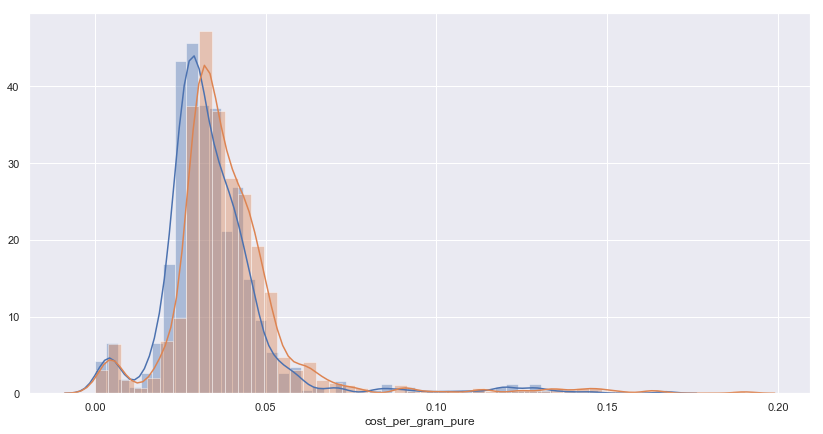

In [32]:
plt.figure(figsize=(14, 7))
sns.distplot (coca_datos['cost_per_gram'])
sns.distplot (coca_datos['cost_per_gram_pure'])


### Formando el primer modelo de regresion con una variable

El costo de la cocaina  por gramo deberia estar relacionada con el costo por gramo puro
ya que de la pura como explicaba en la variable calidad se extrae la cocaina cortada, entonces podriamos tratar de predecir el precio de la coca en funcion de la cocaina pura.

es decir entre mayor sea el costo por gramo (puro), mayor deberia ser el costo por gramo cortado

In [33]:
lm = smf.ols ( formula = "cost_per_gram ~ cost_per_gram_pure", data = coca_datos).fit()


In [34]:
lm.params

Intercept             0.000384
cost_per_gram_pure    0.873876
dtype: float64

el modelo lineal predictivo seria

costo = 0.020108+0.711129*cost_per_gram_pure



In [35]:
lm.pvalues

Intercept             0.081873
cost_per_gram_pure    0.000000
dtype: float64

In [36]:
lm.rsquared

0.9752951094132059

In [37]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          cost_per_gram   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                 3.067e+04
Date:                Fri, 13 Dec 2019   Prob (F-statistic):               0.00
Time:                        09:20:49   Log-Likelihood:                 3465.8
No. Observations:                 779   AIC:                            -6928.
Df Residuals:                     777   BIC:                            -6918.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0004      0.000      1.742      0.082   -4.87e-05       0.001
cost_per_gram_pure     0.8739      0.005    175.141      0.000       0.864       0.884
==============================================================================
Omnibus:                      565.457   Durbin-Watson:                   1.766
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14555.703
Skew:                          -2.951   Prob(JB):                         0.00
Kurtosis:                      23.337   Cond. No.                         49.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
coca_pred=lm.predict(pd.DataFrame(coca_datos["cost_per_gram_pure"]))


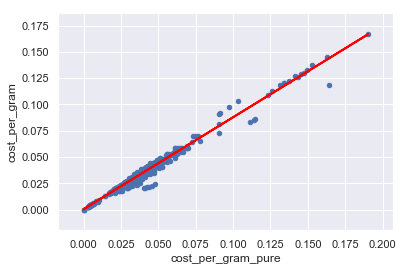

In [39]:
coca_datos.plot(kind="scatter",x="cost_per_gram_pure", y="cost_per_gram")
plt.plot(pd.DataFrame(coca_datos["cost_per_gram_pure"]),coca_pred, c="red", linewidth=2)



In [40]:
coca_datos["coca_pred"]= 0.010598+ 0.778261*coca_datos["cost_per_gram_pure"]
coca_datos["RSE"]=(coca_datos["cost_per_gram"] - coca_datos["coca_pred"])**2


In [41]:
SSD = sum (coca_datos["RSE"])
SSD

0.04172664774427634

In [42]:
RSE = np.sqrt (SSD/(len(coca_datos)-2))
RSE

0.007328181858355659

In [43]:
cpgmean = np.mean(coca_datos["cost_per_gram"])
cpgmean

0.03465831174311031

In [44]:
error = RSE/cpgmean
error


0.2114408201032014

(array([  6.,   1.,  11.,  76., 417., 232.,  16.,   7.,   8.,   5.]),
 array([-0.02398235, -0.02035114, -0.01671992, -0.0130887 , -0.00945749,
        -0.00582627, -0.00219505,  0.00143616,  0.00506738,  0.0086986 ,
         0.01232981]),
 <a list of 10 Patch objects>)

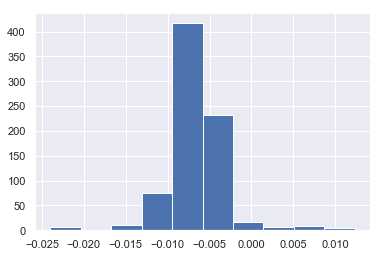

In [45]:
plt.hist((coca_datos["cost_per_gram"] - coca_datos["coca_pred"]))

### Segundo modelo de regresión simple

In [46]:
lm2 = smf.ols ( formula = "btc_price ~ grams", data = coca_datos).fit()


In [47]:
lm2.params

Intercept    0.015072
grams        0.024246
dtype: float64

In [48]:
lm2.params

Intercept    0.015072
grams        0.024246
dtype: float64

In [49]:
lm2.rsquared

0.5038416494531673

In [50]:
coca_pred2=lm2.predict(pd.DataFrame(coca_datos["grams"]))


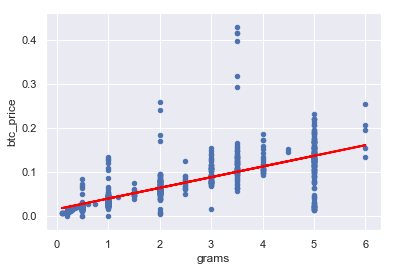

In [51]:
coca_datos.plot(kind="scatter",x="grams", y="btc_price")
plt.plot(pd.DataFrame(coca_datos["grams"]),coca_pred2, c="red", linewidth=2)

# regresión multiple 
* Precio de la coca normal en funcion de la calidad y costo por gram puro 

In [52]:
lm3 = smf.ols(formula = "cost_per_gram ~ grams + btc_price + quality", data=coca_datos).fit()

In [53]:
lm3.params

Intercept    0.025896
grams       -0.011094
btc_price    0.316283
quality      0.000137
dtype: float64

In [54]:
lm3.pvalues

Intercept     1.231350e-05
grams        2.599962e-146
btc_price    3.974757e-141
quality       3.812757e-02
dtype: float64

In [55]:
lm3.rsquared

0.6118411240031545

In [56]:
coca_preds3=lm3.predict(coca_datos[["grams","btc_price","quality"]])

In [57]:
coca_preds3

0       0.035292
1       0.032336
2       0.037767
3       0.040035
4       0.037484
6       0.035341
7       0.032691
8       0.027171
9       0.034342
10      0.031211
12      0.038037
13      0.025124
15      0.036216
16      0.014966
17      0.032574
18      0.008731
20      0.035814
25      0.036092
27      0.023502
29      0.028154
31      0.016188
34      0.034206
35      0.029627
36      0.022759
37      0.015100
39     -0.009770
42      0.041100
43      0.039487
46      0.043068
47      0.040601
          ...   
1453    0.037238
1454    0.033628
1456    0.034273
1457    0.036387
1458    0.036241
1461    0.035742
1462    0.033599
1466    0.037980
1467    0.036503
1468    0.033538
1469    0.029136
1470    0.023881
1472    0.036503
1473    0.040839
1475    0.039350
1476    0.042109
1477    0.034920
1478    0.033805
1479    0.037685
1481    0.031547
1482    0.036715
1483    0.038413
1485    0.027190
1486    0.034476
1487    0.037892
1489    0.013643
1490    0.027255
1491    0.0274

In [58]:
SSD= sum((coca_datos["cost_per_gram"]-coca_preds3)**2)

In [59]:
SSD

0.09793391979904302

In [60]:
RSE = np.sqrt(SSD/(len(coca_datos)-2-1))

In [61]:
RSE

0.011234033331607753

In [62]:
error2=RSE/cpgmean

In [63]:
error2

0.3241367731606533

In [64]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          cost_per_gram   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     407.2
Date:                Fri, 13 Dec 2019   Prob (F-statistic):          9.59e-159
Time:                        09:20:50   Log-Likelihood:                 2392.9
No. Observations:                 779   AIC:                            -4778.
Df Residuals:                     775   BIC:                            -4759.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0259      0.006      4.400      0.000       0.014       0.037
grams         -0.0111      0.000    -32.408      0.000      -0.012      -0.010
btc_price      0.3163      0.010     31.543      0.000       0.297       0.336
quality        0.0001    6.6e-05      2.077      0.038    7.53e-06       0.000
==============================================================================
Omnibus:                      702.920   Durbin-Watson:                   1.448
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25217.882
Skew:                           4.000   Prob(JB):                         0.00
Kurtosis:                      29.700   Cond. No.                     2.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###  validación del modelo 

(array([  3.,  13.,  54., 121., 182., 188., 127.,  64.,  19.,   8.]),
 array([-3.05962861, -2.45139018, -1.84315176, -1.23491333, -0.6266749 ,
        -0.01843648,  0.58980195,  1.19804038,  1.80627881,  2.41451723,
         3.02275566]),
 <a list of 10 Patch objects>)

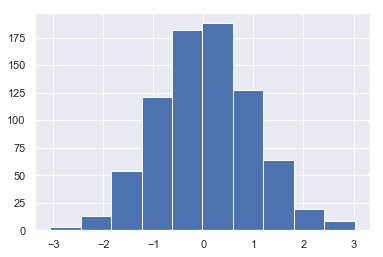

In [65]:
a = np.random.randn(len(coca_datos))#distribución uniforme con el mismo numero de elementos de mi dataset
plt.hist(a)

In [66]:
check = (a<0.8)
training =coca_datos[check]#conjunto de entrenamiento 80%
testing =coca_datos[~check]#conjunto de testing 20%

In [67]:
lm4= smf.ols(formula ="cost_per_gram ~ grams+btc_price+quality", data=training).fit()

In [68]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          cost_per_gram   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     341.1
Date:                Fri, 13 Dec 2019   Prob (F-statistic):          1.63e-129
Time:                        09:20:50   Log-Likelihood:                 1862.2
No. Observations:                 608   AIC:                            -3716.
Df Residuals:                     604   BIC:                            -3699.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0261      0.006      4.074      0.000       0.014       0.039
grams         -0.0112      0.000    -29.171      0.000      -0.012      -0.010
btc_price      0.3161      0.011     29.224      0.000       0.295       0.337
quality        0.0001   7.19e-05      1.929      0.054   -2.52e-06       0.000
==============================================================================
Omnibus:                      555.103   Durbin-Watson:                   1.482
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19877.112
Skew:                           3.976   Prob(JB):                         0.00
Kurtosis:                      29.859   Cond. No.                     2.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### validación con el conjunto de testing 

In [69]:
c_pred = lm4.predict(testing)
c_pred

0       0.035516
1       0.032423
10      0.031412
17      0.032460
18      0.008386
25      0.036316
53      0.040406
57      0.040323
62      0.010059
71     -0.012495
73     -0.010399
77     -0.013402
81      0.040075
90      0.037261
92      0.039839
100     0.038115
104     0.037862
113     0.038194
116     0.040545
120     0.036775
121     0.032985
125     0.037125
126     0.037536
127     0.039125
129     0.040437
132     0.037851
136     0.034287
137     0.037871
145     0.038279
146     0.037452
          ...   
1332    0.038930
1333    0.040684
1334    0.040637
1358    0.036812
1359    0.030673
1360    0.025926
1362    0.036949
1366    0.021026
1371    0.040100
1372    0.041553
1381    0.043368
1382    0.031881
1383    0.036525
1392    0.033877
1393    0.031862
1405    0.054766
1406    0.038282
1409    0.065528
1415    0.019344
1422    0.035679
1427    0.031332
1441    0.033037
1444    0.038684
1449    0.037138
1469    0.029011
1470    0.023550
1475    0.039573
1476    0.0421

In [70]:
SSD = sum ((testing["cost_per_gram"]-c_pred)**2)
SSD

0.020164643770311012

In [71]:
RSE = np.sqrt(SSD/(len(testing)-2-1))
RSE

0.010955712733087998

In [72]:
cpgmm=np.mean(testing["cost_per_gram"])
error = RSE/cpgmm
error #diferencia con respecto al otro modelo 

0.32614518265637515

# regresion con scikit learn

In [73]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
feature_cols = ["cost_per_gram_pure","rating","btc_price","quality","successful_transactions","grams"]

In [74]:
x=coca_datos[feature_cols]
y=coca_datos["cost_per_gram"]

In [75]:
estimator = SVR (kernel ="linear") #indicamos que deseamos un modelo lineal
selector = RFE (estimator,2,step=1)
selector = selector.fit (x,y)#crea el modelo con las variables especificadas en la celda anterior

In [76]:
selector.support_

array([False, False, False, False,  True,  True])

In [77]:
selector.ranking_

array([5, 4, 3, 2, 1, 1])

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
x_pred = x[["grams","successful_transactions"]]

In [80]:
lm5= LinearRegression()
lm5.fit(x_pred,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [81]:
lm5.intercept_

0.04197098757483923

In [82]:
lm5.coef_

array([-3.39620690e-03,  2.13540575e-06])

In [83]:
lm5.score(x_pred,y)

0.10636335024068078

In [84]:
feature_cols2 = ["cost_per_gram_pure","rating","btc_price","quality","successful_transactions","grams"]

In [85]:
x2=coca_datos[feature_cols2]
y2=coca_datos["cost_per_gram"]

In [86]:
estimator = SVR (kernel ="linear") #indicamos que deseamos un modelo lineal
selector = RFE (estimator,2,step=1)
selector = selector.fit (x,y)#crea el modelo con las variables especificadas en la celda anterior

In [87]:
x_pred2 = x2[["cost_per_gram_pure"]]

In [88]:
lm6= LinearRegression()
lm6.fit(x_pred2,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [89]:
lm6.score(x_pred2,y) #valor de rsquared

0.9752951094132059

# clustering 

In [90]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial import distance_matrix

In [91]:
vars=ch.columns.values.tolist()[2:3]
vars

['quality']

In [92]:
dd1=distance_matrix(ch[vars],ch[vars],p=1)

In [93]:
def dm_to_df(dd,col_name):
    return pd.DataFrame(dd, index=col_name, columns=col_name)

In [94]:
dm_to_df (dd1, ch["vendor_name"])

vendor_name,Mister-Molly,Mister-Molly,0ldamsterdamm,lhomme-masquer,SMOOTHCRIMINAL007,SMOOTHCRIMINAL007,SMOOTHCRIMINAL007,SMOOTHCRIMINAL007,SMOOTHCRIMINAL007,cocaineuk,...,gomorraamsterdam,gomorraamsterdam,gomorraamsterdam,gomorraamsterdam,gomorraamsterdam,gomorraamsterdam,gomorraamsterdam,gomorraamsterdam,gomorraamsterdam,gomorraamsterdam
vendor_name,,,,,,,,,,,,,,,,,,,,,
Mister-Molly,0.0,0.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,15.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
Mister-Molly,0.0,0.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,15.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
0ldamsterdamm,1.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,14.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
lhomme-masquer,1.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,14.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
SMOOTHCRIMINAL007,3.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,12.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
SMOOTHCRIMINAL007,3.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,12.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
SMOOTHCRIMINAL007,3.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,12.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
SMOOTHCRIMINAL007,3.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,12.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
SMOOTHCRIMINAL007,3.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,12.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


In [95]:
ch.loc[ch['vendor_name'] == "Mister-Molly"]

,ships_from_to,grams,quality,btc_price,cost_per_gram,cost_per_gram_pure,escrow,vendor_name,successful_transactions,rating
0,NL → EU,1.0,90.0,0.02577,0.025770,0.028633,1,Mister-Molly,90,4.63
1,NL → EU,2.0,90.0,0.05150,0.025750,0.028611,1,Mister-Molly,90,4.63
261,NL → EU,100.0,90.0,1.95800,0.019580,0.021756,1,Mister-Molly,90,4.63
305,NL → EU,10.0,90.0,0.24200,0.024200,0.026889,1,Mister-Molly,90,4.63
346,NL → EU,125.0,90.0,2.44800,0.019584,0.021760,1,Mister-Molly,90,4.63
410,NL → EU,150.0,90.0,2.93700,0.019580,0.021756,1,Mister-Molly,90,4.63
418,NL → EU,15.0,90.0,0.36300,0.024200,0.026889,1,Mister-Molly,90,4.63
471,NL → EU,1000.0,90.0,17.78000,0.017780,0.019756,1,Mister-Molly,90,4.63
589,NL → EU,200.0,90.0,3.81000,0.019050,0.021167,1,Mister-Molly,90,4.63
603,NL → EU,20.0,90.0,0.47300,0.023650,0.026278,1,Mister-Molly,90,4.63


In [96]:
ch.loc[ch['vendor_name'] == "LONDON-UNDERGROUND"]

,ships_from_to,grams,quality,btc_price,cost_per_gram,cost_per_gram_pure,escrow,vendor_name,successful_transactions,rating
28,GB → EU,14.0,50.0,0.24060,0.017186,0.034371,0,LONDON-UNDERGROUND,140,4.87
29,GB → EU,1.0,50.0,0.02054,0.020540,0.041080,1,LONDON-UNDERGROUND,140,4.87
30,GB → EU,28.0,50.0,0.46600,0.016643,0.033286,0,LONDON-UNDERGROUND,140,4.87
31,GB → EU,3.5,50.0,0.07040,0.020114,0.040229,0,LONDON-UNDERGROUND,140,4.87
32,GB → EU,7.0,50.0,0.12900,0.018429,0.036857,0,LONDON-UNDERGROUND,140,4.87


In [97]:
vars2=clustcoca.columns.values.tolist()[1:2]
vars2

['quality']

In [98]:
Y2=linkage (clustcoca[vars],"ward")
Y2

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [1.70000000e+01, 7.79000000e+02, 0.00000000e+00, 3.00000000e+00],
       [2.00000000e+00, 3.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       ...,
       [1.27000000e+03, 1.54800000e+03, 6.97366286e+01, 3.80000000e+01],
       [1.55200000e+03, 1.55300000e+03, 1.13757372e+02, 7.41000000e+02],
       [1.55400000e+03, 1.55500000e+03, 1.78623400e+02, 7.79000000e+02]])

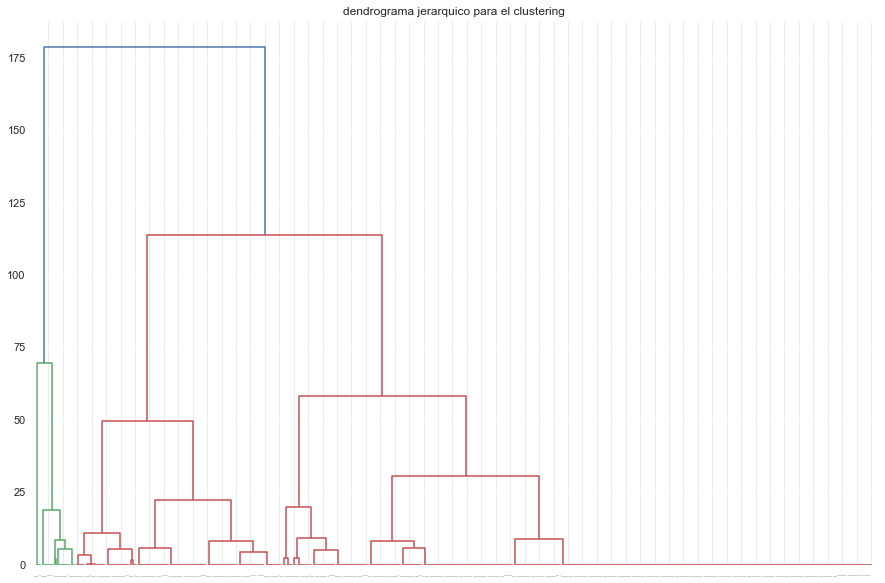

In [99]:
from IPython.display import Image 
Image (filename="img/dendro.png", width=1000, height=900)

(array([  6.,   0.,   0.,   2.,  18.,  19.,  79., 151., 454.,  50.]),
 array([ 50.,  55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <a list of 10 Patch objects>)

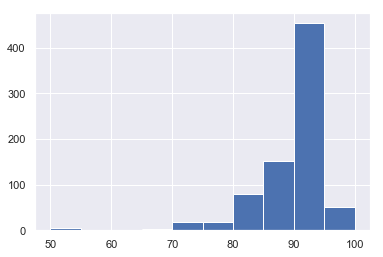

In [100]:
plt.hist(clustcoca["quality"])

In [101]:
clustcoca.head()

,grams,quality,btc_price,cost_per_gram,cost_per_gram_pure,escrow,successful_transactions,rating
0,1.0,90.0,0.02577,0.02577,0.028633,1,90,4.63
1,2.0,90.0,0.05150,0.02575,0.028611,1,90,4.63
2,0.5,89.0,0.01649,0.03298,0.037056,1,620,4.94
3,1.0,89.0,0.04120,0.04120,0.046292,1,15,5.00
4,1.0,87.0,0.03400,0.03400,0.039080,1,28,4.78


In [102]:
from sklearn.cluster import AgglomerativeClustering

In [103]:
clust=AgglomerativeClustering(n_clusters=5, linkage="ward").fit(clustcoca) # creamos 6 clusters

In [104]:
md=pd.Series(clust.labels_)#obtencion de las etiquetas 

Text(0, 0.5, 'freq. de coca cluster')

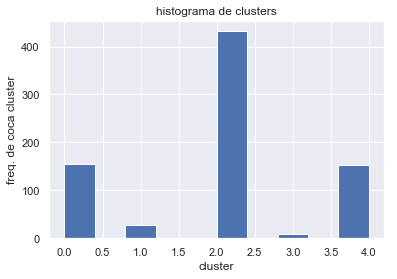

In [105]:
plt.hist(md)
plt.title("histograma de clusters")
plt.xlabel("cluster")
plt.ylabel ("freq. de coca cluster")

In [106]:
clustcoca.groupby("quality").mean()

,grams,btc_price,cost_per_gram,cost_per_gram_pure,escrow,successful_transactions,rating
quality,,,,,,,
50.00,3.000000,0.064923,0.021748,0.043497,0.833333,146.666667,4.910000
65.00,3.000000,0.069800,0.023267,0.035795,1.000000,280.000000,4.940000
67.00,1.000000,0.025200,0.025200,0.037612,1.000000,200.000000,4.890000
70.00,2.615385,0.046592,0.020478,0.029255,1.000000,227.076923,4.812308
72.00,2.400000,0.118964,0.041248,0.057289,1.000000,326.400000,4.922000
75.00,2.225000,0.085622,0.039864,0.053152,0.583333,377.500000,4.907500
78.00,1.440000,0.052280,0.038348,0.049164,1.000000,60.000000,4.980000
79.00,2.250000,0.067750,0.030393,0.038472,1.000000,110.000000,4.890000
80.00,2.577273,0.062995,0.027223,0.034028,1.000000,99.090909,4.901818


In [107]:
clustcoca_norm=(clustcoca-clustcoca.min())/(clustcoca.max()-clustcoca.min())
clustcoca_norm.head()

,grams,quality,btc_price,cost_per_gram,cost_per_gram_pure,escrow,successful_transactions,rating
0,0.152542,0.80,0.060209,0.153940,0.150519,1.0,0.027393,0.393443
1,0.322034,0.80,0.120326,0.153821,0.150403,1.0,0.027393,0.393443
2,0.067797,0.78,0.038527,0.197011,0.194797,1.0,0.190520,0.901639
3,0.152542,0.78,0.096261,0.246115,0.243350,1.0,0.004309,1.000000
4,0.152542,0.74,0.079438,0.203104,0.205439,1.0,0.008310,0.639344


In [108]:
clust2=AgglomerativeClustering(n_clusters=5, linkage="ward").fit(clustcoca_norm) # creamos 6 clusters

In [109]:
etiquetas=pd.Series(clust2.labels_)

Text(0.5, 0, 'cluster')

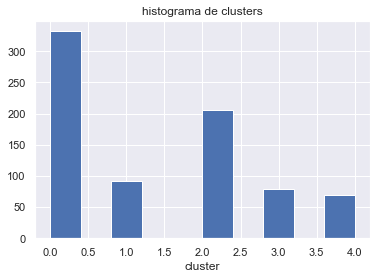

In [110]:
plt.hist(etiquetas)
plt.title ("histograma de clusters")
plt.xlabel("cluster")


In [111]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [112]:
z=linkage(clustcoca_norm, "ward")
z

array([[ 141.        ,  142.        ,    0.        ,    2.        ],
       [ 166.        ,  779.        ,    0.        ,    3.        ],
       [ 571.        ,  780.        ,    0.        ,    4.        ],
       ...,
       [1543.        , 1552.        ,    5.12454126,  411.        ],
       [1550.        , 1554.        ,    9.11315332,  617.        ],
       [1553.        , 1555.        ,   16.09383756,  779.        ]])

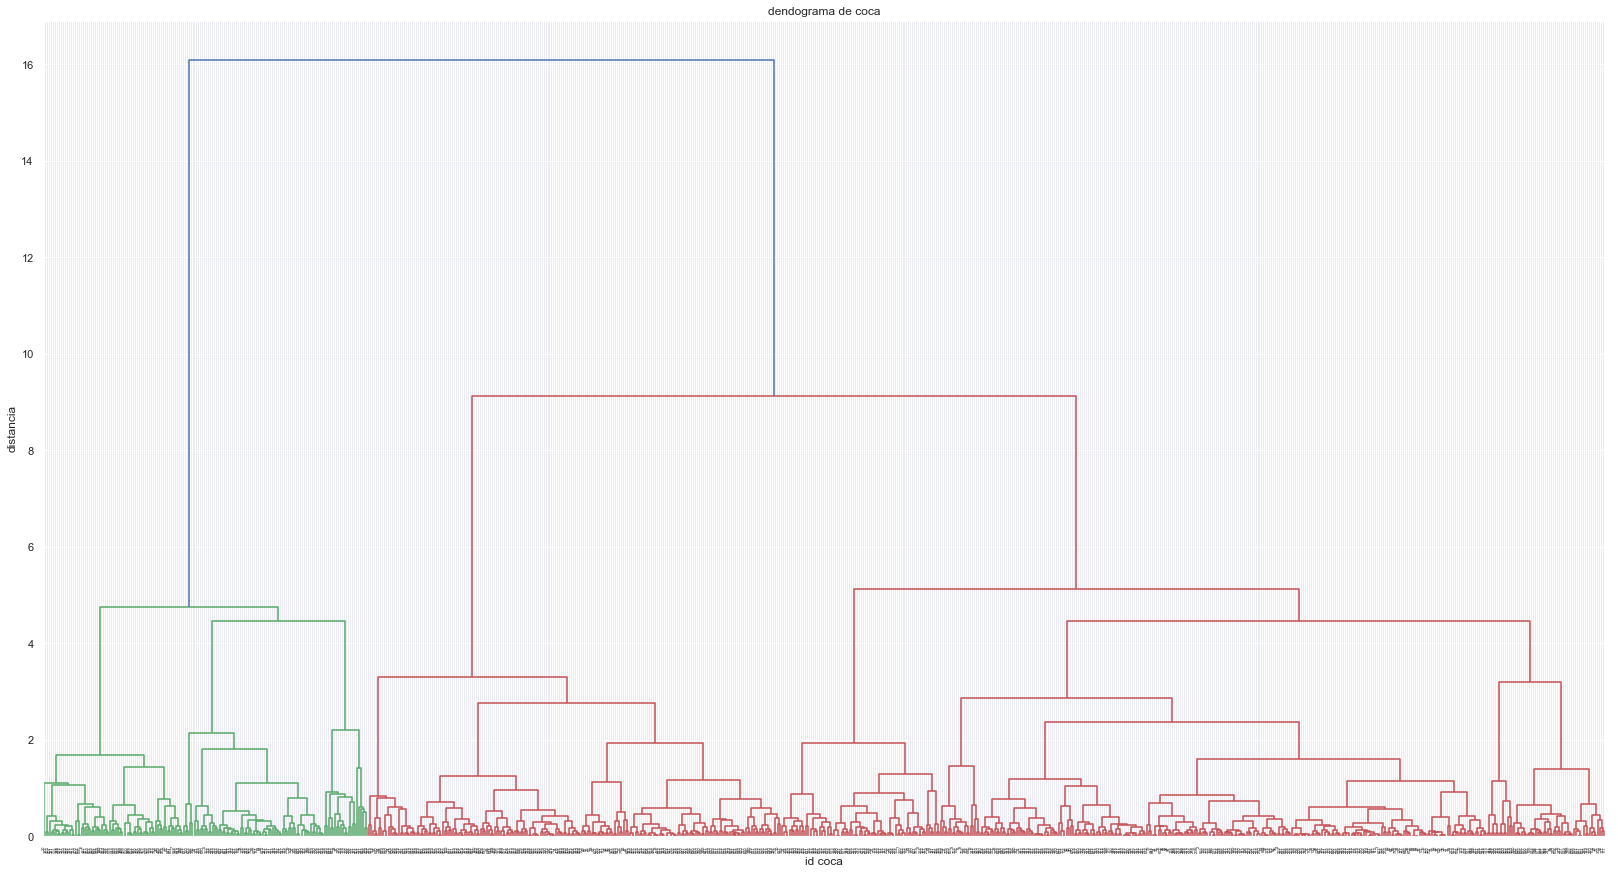

In [113]:
plt.figure (figsize = (28,15))
plt.title("dendograma de coca")
plt.xlabel("id coca")
plt.ylabel("distancia")
dendrogram(z, leaf_rotation=90.,leaf_font_size=4.)
plt.show()

### kmeans

In [114]:
from sklearn.cluster import KMeans
from sklearn import datasets


In [115]:
model =KMeans (n_clusters=6)
model.fit (clustcoca_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [116]:
model.labels_

array([2, 2, 1, 1, 2, 0, 3, 3, 1, 1, 1, 1, 1, 4, 4, 4, 1, 1, 4, 1, 3, 2,
       2, 2, 4, 4, 1, 0, 1, 0, 4, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 4,
       4, 3, 4, 4, 4, 4, 3, 4, 3, 4, 4, 4, 4, 4, 4, 1, 1, 2, 1, 0, 1, 1,
       5, 5, 1, 1, 1, 5, 1, 1, 1, 5, 1, 1, 0, 1, 1, 2, 0, 5, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 5, 1, 2, 5, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 2, 1, 0, 3, 3, 3, 0,
       1, 0, 1, 1, 1, 5, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 5, 5, 0, 0, 0, 5,
       2, 2, 2, 1, 1, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 1, 1, 4, 4, 4, 4, 0,
       2, 5, 0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 2, 2, 5,
       1, 1, 1, 0, 1, 0, 1, 2, 5, 2, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2,
       2, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 5, 2, 0, 1, 1, 0, 5, 5,
       0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 2, 4, 4, 4,

In [117]:
md_k = pd.Series (model.labels_)

In [118]:
clustcoca2=clustcoca
clustcoca_norm["clust_jera"]=md
clustcoca_norm["clust_k"]=md_k

In [119]:
clustcoca_norm.head()

,grams,quality,btc_price,cost_per_gram,cost_per_gram_pure,escrow,successful_transactions,rating,clust_jera,clust_k
0,0.152542,0.80,0.060209,0.153940,0.150519,1.0,0.027393,0.393443,2.0,2.0
1,0.322034,0.80,0.120326,0.153821,0.150403,1.0,0.027393,0.393443,2.0,2.0
2,0.067797,0.78,0.038527,0.197011,0.194797,1.0,0.190520,0.901639,0.0,1.0
3,0.152542,0.78,0.096261,0.246115,0.243350,1.0,0.004309,1.000000,2.0,1.0
4,0.152542,0.74,0.079438,0.203104,0.205439,1.0,0.008310,0.639344,2.0,2.0


(array([ 85.,   0., 270.,   0.,  83.,   0.,  76.,   0., 212.,  53.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

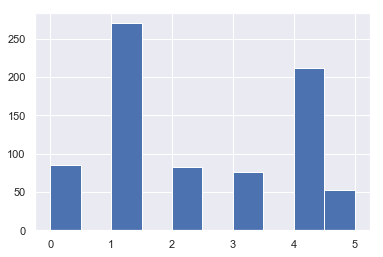

In [120]:
plt.hist(md_k)


# interpretación 

In [121]:
clustcoca_norm.groupby("clust_k").mean()

,grams,quality,btc_price,cost_per_gram,cost_per_gram_pure,escrow,successful_transactions,rating,clust_jera
clust_k,,,,,,,,,
0.0,0.282250,0.764444,0.108317,0.194517,0.194755,0.861111,0.066550,0.818761,1.916667
1.0,0.256910,0.765329,0.091263,0.199112,0.198982,0.830769,0.118235,0.813745,2.107692
2.0,0.201536,0.790625,0.086891,0.192712,0.189750,0.812500,0.069627,0.740779,1.812500
3.0,0.230508,0.776000,0.105051,0.200455,0.199314,0.825000,0.103709,0.785656,1.950000
4.0,0.256391,0.770820,0.125319,0.228723,0.228213,0.786885,0.111492,0.802069,2.106557
5.0,0.331114,0.801429,0.101157,0.189722,0.182767,0.785714,0.060458,0.866511,1.714286
